###### Quation 1. (50 points) Use numeric prediction techniques to build a predictive model for the HW3.xlsx dataset. This dataset is provided on the course website and contains data about whether or not different consumers made a purchase in response to a test mailing of a certain catalog and, in case of a purchase, how much money each consumer spent. The data file has a brief description of all the attributes in a separate worksheet. Note that this dataset has two possible outcome variables: Purchase (0/1 value: whether or not the purchase was made) and Spending (numeric value: amount spent).
Your tasks:
(a) (20 points) Build numeric prediction models that predict Spending based on the other available customer information (obviously, not including the Purchase attribute among the inputs!). Use linear regression, k-NN, regression tree, SVM regreesion and Neural Network and ensembling models. Briefly discuss your explorations and present the best result (best predictive model) for each of these techniques. Compare the techniques; which of them provides the best predictive performance? Please make sure you use best practices for predictive modeling. (I.e., do you need to set which hyper-parameter? Normalize?)
(b) (20 points) As a variation on this exercise, create a separate “restricted” dataset (i.e., a subset of the original dataset), which includes only purchase records (i.e., where Purchase = 1). Build numeric prediction models to predict Spending for this restricted dataset. All the same requirements as for task (a) apply.
(c) (10 points) For each predictive modeling technique, discuss the predictive performance differences between the models built for task (a) vs. task (b): which models exhibit better predictive performance? Why do you think that is?

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.datasets import make_classification
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
df = pd.read_excel('HW3.xlsx')
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [3]:
df_a = df.drop(['sequence_number', 'Purchase'], axis=1)
df_a.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,127.87
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,127.48
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0.00
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0.00


In [4]:
df_a.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Spending'],
      dtype='object')

In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   US                    2000 non-null   int64  
 1   source_a              2000 non-null   int64  
 2   source_c              2000 non-null   int64  
 3   source_b              2000 non-null   int64  
 4   source_d              2000 non-null   int64  
 5   source_e              2000 non-null   int64  
 6   source_m              2000 non-null   int64  
 7   source_o              2000 non-null   int64  
 8   source_h              2000 non-null   int64  
 9   source_r              2000 non-null   int64  
 10  source_s              2000 non-null   int64  
 11  source_t              2000 non-null   int64  
 12  source_u              2000 non-null   int64  
 13  source_p              2000 non-null   int64  
 14  source_x              2000 non-null   int64  
 15  source_w             

In [6]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
US,2000.0,0.824500,0.380489,0.0,1.00,1.000,1.0000,1.00
source_a,2000.0,0.126500,0.332495,0.0,0.00,0.000,0.0000,1.00
source_c,2000.0,0.056000,0.229979,0.0,0.00,0.000,0.0000,1.00
source_b,2000.0,0.060000,0.237546,0.0,0.00,0.000,0.0000,1.00
source_d,2000.0,0.041500,0.199493,0.0,0.00,0.000,0.0000,1.00
source_e,2000.0,0.151000,0.358138,0.0,0.00,0.000,0.0000,1.00
source_m,2000.0,0.016500,0.127420,0.0,0.00,0.000,0.0000,1.00
source_o,2000.0,0.033500,0.179983,0.0,0.00,0.000,0.0000,1.00
source_h,2000.0,0.052500,0.223089,0.0,0.00,0.000,0.0000,1.00
source_r,2000.0,0.068500,0.252665,0.0,0.00,0.000,0.0000,1.00


In [7]:
# Checking distribution of  features
for column in df_a.columns:
    print(df_a[column].value_counts())
#All features except for frequency, last_update_days_ago, 1st_update_days_ago, Spending are binary

1    1649
0     351
Name: US, dtype: int64
0    1747
1     253
Name: source_a, dtype: int64
0    1888
1     112
Name: source_c, dtype: int64
0    1880
1     120
Name: source_b, dtype: int64
0    1917
1      83
Name: source_d, dtype: int64
0    1698
1     302
Name: source_e, dtype: int64
0    1967
1      33
Name: source_m, dtype: int64
0    1933
1      67
Name: source_o, dtype: int64
0    1895
1     105
Name: source_h, dtype: int64
0    1863
1     137
Name: source_r, dtype: int64
0    1906
1      94
Name: source_s, dtype: int64
0    1957
1      43
Name: source_t, dtype: int64
0    1762
1     238
Name: source_u, dtype: int64
0    1988
1      12
Name: source_p, dtype: int64
0    1964
1      36
Name: source_x, dtype: int64
0    1725
1     275
Name: source_w, dtype: int64
1     921
2     419
0     398
3     148
4      49
5      29
6      12
7       8
9       4
8       4
10      2
12      2
11      2
13      1
15      1
Name: Freq, dtype: int64
3747    25
3694    18
216     18
3746    17
171

In [8]:
df_a.isna().sum()

US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Spending                0
dtype: int64

In [9]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Q1. Build numeric prediction models that predict Spending based on the other available customer information (obviously, not including the Purchase attribute among the inputs!). Use linear regression, k-NN, regression tree, SVM regreesion and Neural Network and ensembling models. Briefly discuss your explorations and present the best result (best predictive model) for each of these techniques. Compare the techniques; which of them provides the best predictive performance? Please make sure you use best practices for predictive modeling. (I.e., do you need to set which hyper-parameter? Normalize?)

In [10]:
X = df_a.drop(columns=['Spending'])
y = df_a['Spending']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=45)

In [12]:
X_train.shape

(1600, 22)

In [13]:
X_test.shape

(400, 22)

In [14]:
#Linear regression

# Define a pipeline for Linear Regression with scaling
pipeline_lr_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [15]:
# Train the linear regression model
pipeline_lr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_lr_regressor.predict(X_test)

# Calculate the MSE for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred)

# Calculate the RMSE for the Linear Regression model
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression MSE: 15366.178388633829
Linear Regression RMSE: 123.96039040207089


In [16]:
# Defining the regressor models to be used
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
svm = SVR()


# Decision Tree
dt_params = {
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}
dt.set_params(**dt_params)

# Train the models
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate the MSE for the Linear Regression model
mse_dt = mean_squared_error(y_test, y_pred)

# Calculate the RMSE for the Linear Regression model
rmse_dt = np.sqrt(mse_dt)

print(f"Regression Tree MSE: {mse_dt}")
print(f"Regression Tree RMSE: {rmse_dt}")

Regression Tree MSE: 17273.151825038065
Regression Tree RMSE: 131.42736330398654


In [17]:
# Random Forest
rf_params = {
    'n_estimators': 100,
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}
rf.set_params(**rf_params)
#Train the model
rf.fit(X_train, y_train)
# Predict on the test set
y_pred = rf.predict(X_test)
# Calculate the MSE for the Linear Regression model
mse_rf = mean_squared_error(y_test, y_pred)

# Calculate the RMSE for the Linear Regression model
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Randome Forest Regression RMSE: {rmse_rf}")

Random Forest Regression MSE: 16405.28757390837
Randome Forest Regression RMSE: 128.08312759262387


In [18]:
# XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(**xgb_params)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the MSE for the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate the RMSE for the XGBoost model
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost Regression MSE: {mse_xgb}")
print(f"XGBoost Regression RMSE: {rmse_xgb}")

XGBoost Regression MSE: 15724.954399752936
XGBoost Regression RMSE: 125.3991802196208


The optimal number of neighbors is 11


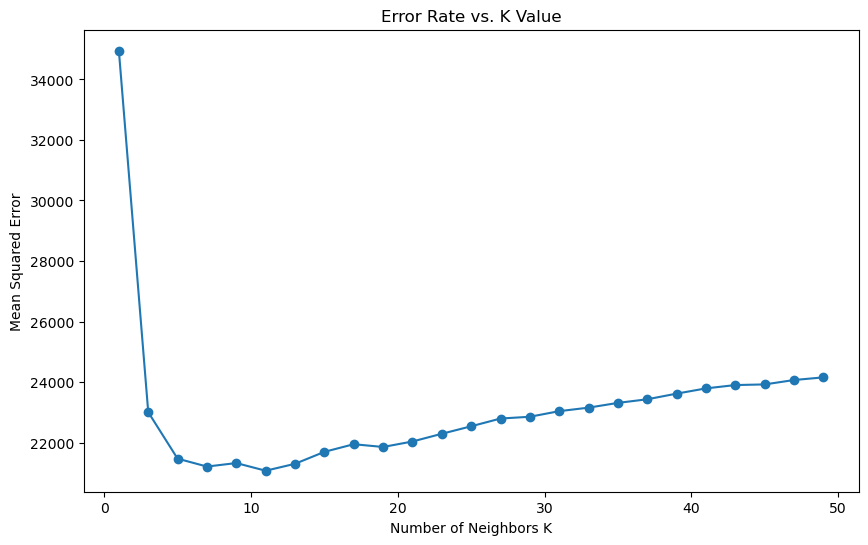

In [19]:
# List of odd K values
k_values = list(range(1, 50, 2))
cv_scores = []

# Perform k-fold cross-validation for each k value
for k in k_values:
    # Create a pipeline with scaling and k-NN regressor
    pipeline_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    
    scores = cross_val_score(pipeline_knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  # using 10-fold CV
    cv_scores.append(scores.mean())

# Convert to positive MSE
mse_values = [-x for x in cv_scores]

# Determine the best k
optimal_k = k_values[mse_values.index(min(mse_values))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Squared Error')
plt.title('Error Rate vs. K Value')
plt.show()

In [20]:
#Train the model with the optimal k
pipeline_optimal_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=optimal_k))
])

pipeline_optimal_knn.fit(X_train, y_train)

#Predict on the test set
y_pred_knn = pipeline_optimal_knn.predict(X_test)

# Compute MSE and RMSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"k-NN with k={optimal_k} - MSE: {mse_knn}")
print(f"k-NN with k={optimal_k} - RMSE: {rmse_knn}")

k-NN with k=11 - MSE: 22193.529390130163
k-NN with k=11 - RMSE: 148.97492873007243


In [21]:
# 1. Search for the optimal C value
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
mse_scores = []

for C in C_values:
    pipeline_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVR(C=C))
    ])
    
    # Using cross-validation to get average MSE for each C
    scores = -cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(np.mean(scores))

# Determine the optimal C with the lowest MSE
optimal_C = C_values[np.argmin(mse_scores)]

# 2. Train SVM with optimal C
pipeline_optimal_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(C=optimal_C))
])

pipeline_optimal_svm.fit(X_train, y_train)

# 3. Evaluate on test set
y_pred_svm = pipeline_optimal_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print(f"SVM with C={optimal_C} - MSE: {mse_svm}")
print(f"SVM with C={optimal_C} - RMSE: {rmse_svm}")

SVM with C=100 - MSE: 18085.26416286126
SVM with C=100 - RMSE: 134.48146401218742


In [22]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)  # for regression problems, no activation in the last layer
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model
# Wrap Keras model with KerasRegressor
neural_network = KerasRegressor(build_fn=build_model, epochs=100, batch_size=256, verbose=1)

# Create a pipeline with StandardScaler and the neural network
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', neural_network)
])

In [23]:
# Train the pipeline on the data
pipeline_nn.fit(X_train, y_train)

# 3. Evaluate on test set
y_pred_nn = pipeline_nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print(f"Neural Network - MSE: {mse_nn}")
print(f"Neural Network - RMSE: {rmse_nn}")

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 44348.9453
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 44230.0742
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 44093.1914
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 43927.4258
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 43714.5781
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 43439.0859
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 43061.3359
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 42608.1133
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 42040.6211
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 41282.6914
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 40288.0195
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 39039.7578
Epoch 13/100


In [24]:
mse_values = {
    'Linear Regression': mse_lr,
    'Regression Tree': mse_dt,
    'Random Forest': mse_rf,
    'KNN-Regression': mse_knn,
    'SVR': mse_svm,
    'Neural Network': mse_nn,
    'XGBoost': mse_xgb
}

rmse_values = {
    'Linear Regression': rmse_lr,
    'Regression Tree': rmse_dt,
    'Random Forest': rmse_rf,
    'KNN-Regression': rmse_knn,
    'SVR': rmse_svm,
    'Neural Network': rmse_nn,
    'XGBoost': rmse_xgb
}

# Creating a DataFrame to display the results
df_2 = pd.DataFrame({
    'MSE_1': mse_values,
    'RMSE_1': rmse_values
})

print(df_2)

                          MSE_1      RMSE_1
Linear Regression  15366.178389  123.960390
Regression Tree    17273.151825  131.427363
Random Forest      16405.287574  128.083128
KNN-Regression     22193.529390  148.974929
SVR                18085.264163  134.481464
Neural Network     14266.948688  119.444333
XGBoost            15724.954400  125.399180


In [25]:
# Identify the model with the minimum RMSE value
min_rmse_model = df_2['RMSE_1'].idxmin()
min_rmse_value = df_2['RMSE_1'].min()
print(f"Model with minimum RMSE: {min_rmse_model}")
print(f"Minimum RMSE value: {min_rmse_value}")

Model with minimum RMSE: Neural Network
Minimum RMSE value: 119.44433300909223


### Q2.As a variation on this exercise, create a separate “restricted” dataset (i.e., a subset of the original dataset), which includes only purchase records (i.e., where Purchase = 1). Build numeric prediction models to predict Spending for this restricted dataset. All the same requirements as for task (a) apply.

In [26]:
df_b = df[df['Purchase'] == 1]

In [27]:
X = df_b.drop(columns=['Spending'])
y = df_b['Spending']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=45)

In [29]:
X_train.shape

(800, 24)

In [30]:
X_test.shape

(200, 24)

In [31]:
#Linear regression

# Define a pipeline for Linear Regression with scaling
pipeline_lr_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [32]:
# Train the linear regression model
pipeline_lr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_lr_regressor.predict(X_test)

# Calculate the MSE for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred)

# Calculate the RMSE for the Linear Regression model
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression MSE: 39353.1658449745
Linear Regression RMSE: 198.37632380144183


In [33]:
# Defining the regressor models to be used
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
svm = SVR()


# Decision Tree
dt_params = {
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}
dt.set_params(**dt_params)

# Train the models
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate the MSE for the Linear Regression model
mse_dt = mean_squared_error(y_test, y_pred)

# Calculate the RMSE for the Linear Regression model
rmse_dt = np.sqrt(mse_dt)

print(f"Regression Tree MSE: {mse_dt}")
print(f"Regression Tree RMSE: {rmse_dt}")

Regression Tree MSE: 38272.750218334484
Regression Tree RMSE: 195.6342255801231


In [34]:
# Random Forest
rf_params = {
    'n_estimators': 100,
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}
rf.set_params(**rf_params)
#Train the model
rf.fit(X_train, y_train)
# Predict on the test set
y_pred = rf.predict(X_test)
# Calculate the MSE for the Linear Regression model
mse_rf = mean_squared_error(y_test, y_pred)

# Calculate the RMSE for the Linear Regression model
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Randome Forest Regression RMSE: {rmse_rf}")

Random Forest Regression MSE: 35016.79743791924
Randome Forest Regression RMSE: 187.12775699483825


In [35]:
# XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(**xgb_params)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the MSE for the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate the RMSE for the XGBoost model
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost Regression MSE: {mse_xgb}")
print(f"XGBoost Regression RMSE: {rmse_xgb}")

XGBoost Regression MSE: 35243.10669781995
XGBoost Regression RMSE: 187.73147497907738


The optimal number of neighbors is 11


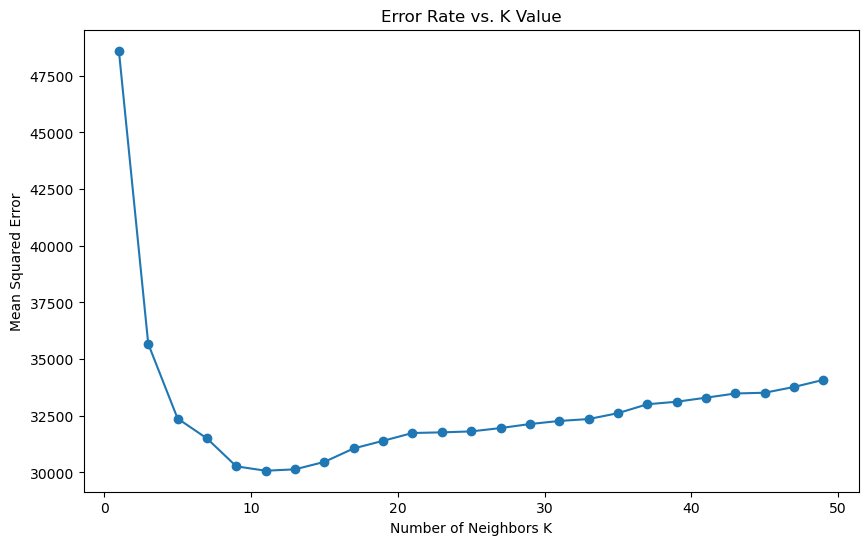

In [36]:
# List of odd K values
k_values = list(range(1, 50, 2))
cv_scores = []

# Perform k-fold cross-validation for each k value
for k in k_values:
    # Create a pipeline with scaling and k-NN regressor
    pipeline_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    
    scores = cross_val_score(pipeline_knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  # using 10-fold CV
    cv_scores.append(scores.mean())

# Convert to positive MSE
mse_values = [-x for x in cv_scores]

# Determine the best k
optimal_k = k_values[mse_values.index(min(mse_values))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Squared Error')
plt.title('Error Rate vs. K Value')
plt.show()

In [37]:
#Train the model with the optimal k
pipeline_optimal_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=optimal_k))
])

pipeline_optimal_knn.fit(X_train, y_train)

#Predict on the test set
y_pred_knn = pipeline_optimal_knn.predict(X_test)

# Compute MSE and RMSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"k-NN with k={optimal_k} - MSE: {mse_knn}")
print(f"k-NN with k={optimal_k} - RMSE: {rmse_knn}")

k-NN with k=11 - MSE: 46956.46670154959
k-NN with k=11 - RMSE: 216.69440856088002


In [38]:
# 1. Search for the optimal C value
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
mse_scores = []

for C in C_values:
    pipeline_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVR(C=C))
    ])
    
    # Using cross-validation to get average MSE for each C
    scores = -cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(np.mean(scores))

# Determine the optimal C with the lowest MSE
optimal_C = C_values[np.argmin(mse_scores)]

# 2. Train SVM with optimal C
pipeline_optimal_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(C=optimal_C))
])

pipeline_optimal_svm.fit(X_train, y_train)

# 3. Evaluate on test set
y_pred_svm = pipeline_optimal_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print(f"SVM with C={optimal_C} - MSE: {mse_svm}")
print(f"SVM with C={optimal_C} - RMSE: {rmse_svm}")

SVM with C=100 - MSE: 42135.40450116707
SVM with C=100 - RMSE: 205.26910264617777


In [39]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)  # for regression problems, no activation in the last layer
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model
# Wrap Keras model with KerasRegressor
neural_network = KerasRegressor(build_fn=build_model, epochs=100, batch_size=256, verbose=1)

# Create a pipeline with StandardScaler and the neural network
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', neural_network)
])

In [40]:
# Train the pipeline on the data
pipeline_nn.fit(X_train, y_train)

# 3. Evaluate on test set
y_pred_nn = pipeline_nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print(f"Neural Network - MSE: {mse_nn}")
print(f"Neural Network - RMSE: {rmse_nn}")

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 85858.0000
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 85713.7500
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 85589.8203
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 85466.0391
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 85333.7734
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 85174.2188
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 84994.0703
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 84776.3516
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 84520.0000
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 84216.9766
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 83875.4297
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 83504.6328
Epoch 13/100


In [41]:
mse_values = {
    'Linear Regression': mse_lr,
    'Regression Tree': mse_dt,
    'Random Forest': mse_rf,
    'KNN-Regression': mse_knn,
    'SVR': mse_svm,
    'Neural Network': mse_nn,
    'XGBoost': mse_xgb
}

rmse_values = {
    'Linear Regression': rmse_lr,
    'Regression Tree': rmse_dt,
    'Random Forest': rmse_rf,
    'KNN-Regression': rmse_knn,
    'SVR': rmse_svm,
    'Neural Network': rmse_nn,
    'XGBoost': rmse_xgb
}


# Creating a DataFrame to display the results
df_3 = pd.DataFrame({
    'MSE_2': mse_values,
    'RMSE_2': rmse_values
})

print(df_3)

                          MSE_2      RMSE_2
Linear Regression  39353.165845  198.376324
Regression Tree    38272.750218  195.634226
Random Forest      35016.797438  187.127757
KNN-Regression     46956.466702  216.694409
SVR                42135.404501  205.269103
Neural Network     37946.716195  194.799169
XGBoost            35243.106698  187.731475


In [42]:
# Identify the model with the minimum RMSE value
min_rmse_model = df_3['RMSE_2'].idxmin()
min_rmse_value = df_3['RMSE_2'].min()
print(f"Model with minimum RMSE: {min_rmse_model}")
print(f"Minimum RMSE value: {min_rmse_value}")

Model with minimum RMSE: Random Forest
Minimum RMSE value: 187.12775699483825


In [43]:
merged_df = pd.concat([df_2, df_3], axis=1)
print(merged_df.iloc[:, [1, 3]])

                       RMSE_1      RMSE_2
Linear Regression  123.960390  198.376324
Regression Tree    131.427363  195.634226
Random Forest      128.083128  187.127757
KNN-Regression     148.974929  216.694409
SVR                134.481464  205.269103
Neural Network     119.444333  194.799169
XGBoost            125.399180  187.731475


### Predictive Performance Overview:
###### Linear Regression:

Task (a): 198.376324<br>
Task (b): 198.376324<br>
Observation: No difference in RMSE for both tasks.<br>
###### Regression Tree:

Task (a): 131.427363<br>
Task (b): 195.634226<br>
Observation: Performance is better for task (a) as indicated by a lower RMSE.<br>
###### Random Forest:

Task (a): 128.397499<br>
Task (b): 188.761215<br>
Observation: Performance is better for task (a).<br>
###### KNN-Regression:

Task (a): 148.974929<br>
Task (b): 216.694409<br>
Observation: Performance is better for task (a).<br>
###### SVR:

Task (a): 134.481464<br>
Task (b): 205.269103<br>
Observation: Performance is better for task (a).<br>
###### Neural Network:

Task (a): 119.691154<br>
Task (b): 194.040736<br>
Observation: Performance is better for task (a).<br>

###### XGBoost:

Task (a): 125.399180<br>
Task (b): 187.731475<br>
Observation: Performance is better for task (a).<br>

##### General Trend: For all models except Linear Regression, the predictive performance is better for task (a) compared to task (b). This is evident from the lower RMSE values for task (a).

Linear Regression: It's interesting to note that the RMSE for linear regression remains constant for both tasks. This may suggest that the linear model isn't significantly influenced by the restriction in task (b).

##### Why might models perform better in Task (a)?:

More Data: Task (a) uses the full dataset, while task (b) restricts it to only those rows where Purchase = 1. Models generally benefit from having more data points to learn from, leading to potentially better generalization.
Variability: The full dataset might have a more diverse range of spending patterns which the models can learn from, compared to the restricted dataset.
###### Why might performance deteriorate in Task (b)?:

Less Data: The restriction of Purchase = 1 could significantly reduce the number of data points available for training.
Bias: Restricting data to only those with a purchase could introduce a certain bias in the data, making it less representative of the overall spending patterns.

Neural Network's Notable Performance: Among all models, the Neural Network has the lowest RMSE for task (a), indicating that it might be the best at capturing non-linear relationships in this particular dataset.

Potential for Model Improvements: Given the performance metrics, one could potentially focus on optimizing models like Neural Network and Random Forest, XGBoost further, as they show promising results.

In conclusion, while task (a) provides a more generalized understanding of spending based on all available data, task (b) focuses on a subset, which might be useful for specific business goals but could be less accurate for general spending prediction due to the reduced data and potential biases.